In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from scipy.interpolate import make_interp_spline, BSpline
import re
import ast
import seaborn as sns
from Scripts import Trainings
from Scripts import Plotting
from Scripts import Computing_functions
import importlib
import tensorflow as tf
from scipy.ndimage.filters import gaussian_filter1d

sns.set_context('paper') 
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)

PWD : /home/bouissob/Code
PWD : /home/bouissob/Code


<module 'Scripts.Trainings' from '/home/bouissob/Code/Scripts/Trainings.py'>

In [2]:
File_path = '/bettik/bouissob/FAVIER_2019/'
Bet_path = '/bettik/bouissob/'
Data_type = 'COM_NEMO-CNRS'
SIZE = 13
Var_X_BIG_Extra = ['iceDraft', 'bathymetry', 'Slope_iceDraft_x', 'Slope_bathymetry_x',
                   'Slope_iceDraft_y', 'Slope_bathymetry_y', 'Big_T', 'Big_S',
                  'Distances_ground_line', 'Distances_front_line']
OcT = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']
Train_oc_exp = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4', 'CPL_EXP10_rst','CPL_EXP13_rst', 'CPL_EXP22_rst', 'CPL_EXP23_rst']
ALL_EXP = ['CPL_EXP10_rst','CPL_EXP11_rst', 'CPL_EXP12_rst','CPL_EXP13_rst','CPL_EXP20_rst','CPL_EXP21_rst','CPL_EXP22_rst', 'CPL_EXP23_rst']

NEW = ['IceOcean1r_ElmerIce', 'IceOcean1ra_ElmerIce']
NEW_under100supr = ['IceOcean1r_ElmerIce_under100supr', 'IceOcean1ra_ElmerIce_under100supr']
NEW_fill100 = ['IceOcean1r_ElmerIce_fill100', 'IceOcean1ra_ElmerIce_fill100']
Var_X_slopexy = ['iceDraft', 'bathymetry', 'Slope_iceDraft_x', 'Slope_bathymetry_x',
                   'Slope_iceDraft_y', 'Slope_bathymetry_y', 'temperatureYZ', 'salinityYZ',
                  'Distances_ground_line', 'Distances_front_line']
ALL_OC = OcT + ALL_EXP

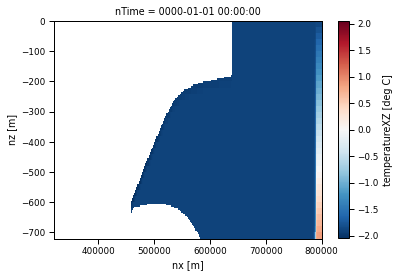

In [ ]:
Bet_path = '/bettik/bouissob/'
p = Bet_path + 'ISOMIP+/Ocean1_COM_NEMO-CNRS.nc'
d = xr.open_dataset(p)
d = d.assign_coords({'nx': d.x,
                           'ny': d.y,
                           'nz':  d.z,
                           'nTime': d.time})
d.assign_coords()
d.temperatureXZ.isel(nTime = 0).plot()

In [132]:
NN_attrib = {'Ocean' : OcT, 'Epoch' : None, 'Neur' : '8',
            'Method_data' : 4, 'Exact' : False, 'Extra_n' : 'Benchmark_swish_relu'}

A2 = Computing_functions.Compute_benchmark_function(NN_attributes = NN_attrib, Get_time = True,
                                                   li_activation = ['relu', 'swish'], Ocean = OcT, message=0)

relu  : 1/2            /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_50_N_8_Ch_0-1652123223_Ex_Benchmark_swish_relu  :  1/2
['8']
relu  : 1/2            /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_50_N_8_Ch_0-1652182789_Ex_Benchmark_swish_relu  :  2/2
['8', '8']
swish  : 2/2            /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_50_N_8_Ch_0-1652089400_Ex_Benchmark_swish_relu  :  1/1
['8']


In [134]:
A2

[[[750.2226451949973, 553.1491549299972], [721, 721], ['8', '8']],
 [[719.615237768], [721], ['8']]]

In [4]:
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4']
NN_attrib = {'Ocean' : OcT}

li = Computing_functions.Compute_benchmark(name = 'Drop_Var_bench_128', NN_attributes = NN_attrib, Oc = OcT)

Starting /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_128_128_128_128_128_Ch_0-1653046604_Ex_Drop_Var_bench_128        1/9


2022-05-23 11:10:21.685160: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-23 11:10:21.685440: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-23 11:10:21.694181: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Starting /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_128_128_128_128_128_Ch_0-1653161787_Ex_Drop_Var_bench_128        2/9
Starting /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_128_128_128_128_128_Ch_0-1653141884_Ex_Drop_Var_bench_128        3/9
Starting /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_128_128_128_128_128_Ch_0-1653184181_Ex_Drop_Var_bench_128        4/9
Starting /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_128_128_128_128_128_Ch_0-1653202773_Ex_Drop_Var_bench_128        5/9
Starting /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_128_128_128_128_128_Ch_0-1653220299_Ex_Drop_Var_bench_128        6/9
Starting /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_128_128_128_128_128_Ch_0-1653238639_Ex_Drop_Var_bench_128        7/9
Starting /home/bouissob/Code/Auto_model/

In [14]:
 df = pd.DataFrame(li, columns = ['RMSEs', 'RMSE_tot', 'Var'])

In [28]:
df.to_csv(f'{os.getcwd()}/Cached_data/Var_drop_benchmark_128EpNeur128.csv')

In [24]:
RMSEs = []
for l in li:
    RMSEs.append(l[0])

In [25]:
df[OcT] = RMSEs

In [3]:
DF = pd.read_csv(f'{os.getcwd()}/Cached_data/Benchmark_relu_swish.csv')
DF = DF.append(DF.loc[DF.Neur == '8'], ignore_index = True)
DF.sort_values('Param_swish', inplace = True, ascending=True)
DF.reset_index(inplace = True, drop = True)
DF.loc[3, 'RMSEs_relu'] = 1.7837450369297072
DF.loc[3, 'Time_relu'] = 553.1491549299972
A

df_swish = pd.DataFrame()

df_swish['RMSEs_swish'] = A[1][1]
df_swish['Param_swish'] = A[1][0]
df_swish.sort_values('Param_swish', inplace = True, ascending=True)
df_swish.reset_index(inplace = True)

df = pd.DataFrame()
df['RMSEs_relu'] = A[0][1]
df['Param_relu'] = A[0][0]
df.sort_values('Param_relu', inplace = True, ascending=True)
df.reset_index(inplace = True,drop = True)

df[['RMSEs_swish', 'Param_swish']] = df_swish[['RMSEs_swish', 'Param_swish']]
DF['Precision'] = ( DF['RMSEs_relu'] - DF['RMSEs_swish'] ) / DF['RMSEs_relu']

#DF['Precision'] = ( DF['RMSEs_relu'] - DF['RMSEs_swish'] ) 
fig = plt.figure()
ax = plt.gca()
ax.scatter(DF['Param_swish'], DF['Precision'])
ax2 = ax.twinx()
ax2.scatter(DF['Param_swish'], DF['Time_swish'] - DF['Time_relu'], c = 'r')
#ax2.set_yscale('log')
ax2.set_xscale('log')
ax.set_xscale('log')
ax.set_xlabel("Parameter count")

ax.set_ylabel("RMSE percent difference (Swish - Relu)", color="Blue")
ax2.set_ylabel("Difference training time(s) (Swish - Relu)", color="red")
fig.savefig(f'{os.getcwd()}/Image_output/DiffReluSwish.png', facecolor = 'white', bbox_inches='tight', dpi = 300)
#ax.set_yscale('log')

In [ ]:
DF

,RMSEs_relu,Param_relu,RMSEs_swish,Param_swish,Precision,Time_relu,Time_swish,Neur
0,5.355072,91,3.213724,91,0.399873,499.856967,772.747491,1
1,3.241218,381,1.949766,381,0.398446,750.222645,1432.638411,4_4
3,1.783745,721,1.631731,721,0.085222,553.149155,719.615238,8
4,1.296547,721,1.631731,721,-0.258521,2049.190481,719.615238,8
5,1.783745,721,1.631731,721,0.085222,553.149155,719.615238,8
6,0.743953,1713,0.716302,1713,0.037168,752.388573,858.759244,16_16
7,0.710283,1985,0.648914,1985,0.086401,1077.396691,1008.985102,16_16_16
8,0.623989,3937,0.585461,3937,0.061745,956.441612,1435.901046,32_32
9,0.590007,4993,0.530389,4993,0.101047,1335.781637,2260.818589,32_32_32
10,0.495988,14081,0.448458,14081,0.095829,1037.402309,2821.411891,64_64_64


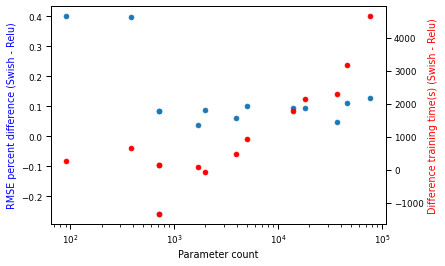

In [4]:
NN_attrib = {'Ocean' : OcT, 'Epoch' : None, 'Activation_fct' : 'relu',
            'Method_data' : 4, 'Exact' : False, 'Extra_n' : 'Benchmark_swish_relu'}
Trainings.Get_model_path_json(**NN_attrib)

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_50_N_1_Ch_0-1652122514_Ex_Benchmark_swish_relu',
 '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_50_N_8_Ch_0-1652123223_Ex_Benchmark_swish_relu',
 '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_50_N_4_4_Ch_0-1652124161_Ex_Benchmark_swish_relu',
 '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_50_N_16_16_Ch_0-1652126398_Ex_Benchmark_swish_relu',
 '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_50_N_32_32_Ch_0-1652127333_Ex_Benchmark_swish_relu',
 '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_50_N_16_16_16_Ch_0-1652128593_Ex_Benchmark_swish_relu',
 '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_50_N_32_32_32_Ch_0-1652129732_Ex_Benchmark_swish_relu',
 '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_50_N_64_6

In [33]:
p = f'{os.getcwd()}/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst_CPL_EXP13_rst_CPL_EXP22_rst_CPL_EXP23_rst/Ep_128_N_96_96_96_96_96_Ch_0-1650407902_Ex_/'
Config = Trainings.Get_model_attributes(p)
Vars = Config.get('Var_X')
if 'T_0' in Vars:
    inst = []
    for i in range(40):
        Vars.remove(f'T_{i}')
        inst.append(f'T_{i}')
    Vars.append(inst)
    Vars.append(inst + ['-ms'])
if 'S_0' in Vars:
    inst = []
    for i in range(40):
        Vars.remove(f'S_{i}')
        inst.append(f'S_{i}')
    Vars.append(inst)
    Vars.append(inst + ['-ms'])
if 'Slope_iceDraft_x' in Vars:
    Vars.remove('Slope_iceDraft_x')
    Vars.remove('Slope_iceDraft_y')
    Vars.append(['Slope_iceDraft_x', 'Slope_iceDraft_y'])

if 'Slope_bathymetry_x' in Vars:
    Vars.remove('Slope_bathymetry_x')
    Vars.remove('Slope_bathymetry_y')
    Vars.append(['Slope_bathymetry_x', 'Slope_bathymetry_y'])

In [36]:
for shuffle in Vars:
    print(shuffle if type(shuffle) != list else shuffle.copy())

iceDraft
bathymetry
Distances_ground_line
Distances_front_line
['T_0', 'T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7', 'T_8', 'T_9', 'T_10', 'T_11', 'T_12', 'T_13', 'T_14', 'T_15', 'T_16', 'T_17', 'T_18', 'T_19', 'T_20', 'T_21', 'T_22', 'T_23', 'T_24', 'T_25', 'T_26', 'T_27', 'T_28', 'T_29', 'T_30', 'T_31', 'T_32', 'T_33', 'T_34', 'T_35', 'T_36', 'T_37', 'T_38', 'T_39']
['T_0', 'T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7', 'T_8', 'T_9', 'T_10', 'T_11', 'T_12', 'T_13', 'T_14', 'T_15', 'T_16', 'T_17', 'T_18', 'T_19', 'T_20', 'T_21', 'T_22', 'T_23', 'T_24', 'T_25', 'T_26', 'T_27', 'T_28', 'T_29', 'T_30', 'T_31', 'T_32', 'T_33', 'T_34', 'T_35', 'T_36', 'T_37', 'T_38', 'T_39', '-ms']
['S_0', 'S_1', 'S_2', 'S_3', 'S_4', 'S_5', 'S_6', 'S_7', 'S_8', 'S_9', 'S_10', 'S_11', 'S_12', 'S_13', 'S_14', 'S_15', 'S_16', 'S_17', 'S_18', 'S_19', 'S_20', 'S_21', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'S_27', 'S_28', 'S_29', 'S_30', 'S_31', 'S_32', 'S_33', 'S_34', 'S_35', 'S_36', 'S_37', 'S_38', 'S_39

In [23]:
# for f in ALL_EXP:
#     print(f'Starting  {f}')
#     f_p = f'{Bet_path}Method_Data/COM_NEMO-CNRS/Method_4/{f}_lite.csv'
#     df = pd.read_csv(f_p)
#     df = df.loc[df.iceDraft >= 100]
#     df.to_csv(f'{Bet_path}Method_Data/COM_NEMO-CNRS/Method_4/{f}_under100supr_lite.csv')
# for f in ALL_EXP:
#     print(f'Starting  {f}')
#     f_p = f'{Bet_path}Method_Data/COM_NEMO-CNRS/Method_4/{f}_lite.csv'
#     df = pd.read_csv(f_p)
#     df['iceDraft'] = np.where(df['iceDraft'] < 100 , 100, df['iceDraft'])
#     df.to_csv(f'{Bet_path}Method_Data/COM_NEMO-CNRS/Method_4/{f}_fill100_lite.csv')

In [46]:
f

'/bettik/bouissob/FAVIER_2019/CPL_EXP13_rst_COM_NEMO-CNRS.nc'

In [44]:
data = xr.open_dataset(f)
data = data.assign_coords({'nx': data.x,
                       'ny': data.y,
                       'nz': - data.z,
                       'nTime': data.time})

In [5]:
Dict = {'EXP20' : 'Warm 0', 'EXP10' : 'Warm 1', 'EXP11' : 'Warm 2', 'EXP13' : 'Warm 3', 'EXP22' : 'Cold 0', 'EXP12' : 'Cold 1'}
Color = {'Warm 0' : (1, 0, 0, 0.25), 'Warm 1' : (1, 0, 0, 0.5), 'Warm 2' : (1, 0, 0, 0.75), 'Warm 3' : (0.5, 0, 0, 1), 
         'Cold 0' : (0, 0, 1, 0.5), 'Cold 1' : (0, 0, 1, 1)}

def Vertic_profil(f, T, var = 'temperatureXZ', s = .5):
    #plt.figure()
    data = xr.open_dataset(f)
    data = data.assign_coords({'nx': data.x,
                           'ny': data.y,
                           'nz': - data.z,
                           'nTime': data.time})
    T = data[var].isel(nTime = T).isel(nx = len(data.nx) - 1)
    Z = T.nz
    name = re.findall('CPL_(\w+)_rst', f)[0]
    xnew = np.linspace(min(Z), T.max(), 300)
    if name in Dict:
        ysmoothed = gaussian_filter1d(T, sigma=2)
        plt.plot(ysmoothed, Z, label = Dict[name], color = Color[Dict[name]])
        [plt.axhline(y=i*100, linestyle='dashed', c = 'grey', linewidth=1) for i in np.unique((Z/100).astype(int)) if i%2 != 0]
    return Z, T

Starting /bettik/bouissob/FAVIER_2019/CPL_EXP12_rst_COM_NEMO-CNRS.nc   0/7
Starting /bettik/bouissob/FAVIER_2019/CPL_EXP22_rst_COM_NEMO-CNRS.nc   1/7
Starting /bettik/bouissob/FAVIER_2019/CPL_EXP20_rst_COM_NEMO-CNRS.nc   2/7
Starting /bettik/bouissob/FAVIER_2019/CPL_EXP10_rst_COM_NEMO-CNRS.nc   3/7
Starting /bettik/bouissob/FAVIER_2019/CPL_EXP21_rst_COM_NEMO-CNRS.nc   4/7
Starting /bettik/bouissob/FAVIER_2019/CPL_EXP11_rst_COM_NEMO-CNRS.nc   5/7
Starting /bettik/bouissob/FAVIER_2019/CPL_EXP23_rst_COM_NEMO-CNRS.nc   6/7
Starting /bettik/bouissob/FAVIER_2019/CPL_EXP13_rst_COM_NEMO-CNRS.nc   7/7


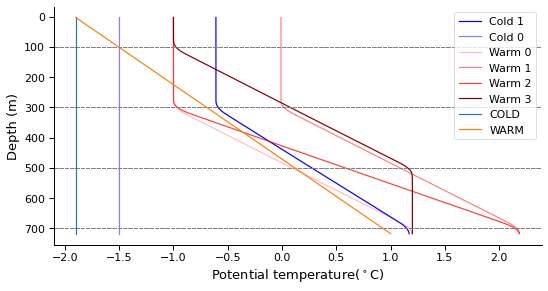

In [25]:
size = 13
dim = (8.75/3*3, 8.75/3*1.5)
files = glob.glob(f'{File_path}*')
f = plt.figure()
f.set_size_inches(dim)
T = 1199
s = 1
for i, fi in enumerate(reversed(files)):
    print(f'Starting {fi}   {i}/{len(files)-1}')
    Z, _ = Vertic_profil(fi, T, s = s)

    
    
COLD = [-1.9,-1.9]
WARM = [-1.9, 1]
z = [min(Z).values, max(Z).values]
plt.plot(COLD, z, label = 'COLD')
plt.plot(WARM, z, label = 'WARM')
plt.gca().invert_yaxis()
plt.legend(fontsize=size-2)
plt.xlabel('Potential temperature($^\circ$C)', fontsize=size)
plt.ylabel('Depth (m)', fontsize=size)
plt.gca().tick_params(labelsize=size-2)
#plt.title('TemperatureXZ profiles')
sns.despine()
#plt.savefig(f'Image_output/All_exp_{T}_temperature.png', facecolor = 'white', bbox_inches='tight', dpi = 300)


labelsize=5

Starting /bettik/bouissob/FAVIER_2019/CPL_EXP12_rst_COM_NEMO-CNRS.nc   0/7
Starting /bettik/bouissob/FAVIER_2019/CPL_EXP22_rst_COM_NEMO-CNRS.nc   1/7
Starting /bettik/bouissob/FAVIER_2019/CPL_EXP20_rst_COM_NEMO-CNRS.nc   2/7
Starting /bettik/bouissob/FAVIER_2019/CPL_EXP10_rst_COM_NEMO-CNRS.nc   3/7
Starting /bettik/bouissob/FAVIER_2019/CPL_EXP21_rst_COM_NEMO-CNRS.nc   4/7
Starting /bettik/bouissob/FAVIER_2019/CPL_EXP11_rst_COM_NEMO-CNRS.nc   5/7
Starting /bettik/bouissob/FAVIER_2019/CPL_EXP23_rst_COM_NEMO-CNRS.nc   6/7
Starting /bettik/bouissob/FAVIER_2019/CPL_EXP13_rst_COM_NEMO-CNRS.nc   7/7


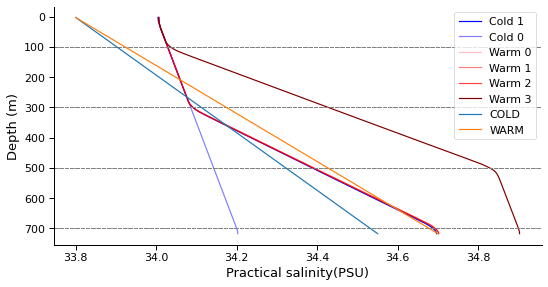

In [6]:
size = 13
dim = (8.75/3*3, 8.75/3*1.5)
f = plt.figure()
f.set_size_inches(dim)
T = 1199
Names = []
S_all = []
files = glob.glob(f'{File_path}*')

for i, fi in enumerate(reversed(files)):
    print(f'Starting {fi}   {i}/{len(files)-1}')
    Z, S  = Vertic_profil(fi, T, var = 'salinityXZ')
    name = re.findall('CPL_(\w+)_rst', fi)[0]
    if name in Dict:
        S_all.append(S)
        Names.append(name)
COLD = [33.8, 34.55]
WARM = [33.8, 34.7]
z = [min(Z).values, max(Z).values]
plt.plot(COLD, z, label = 'COLD')
plt.plot(WARM, z, label = 'WARM')
plt.gca().invert_yaxis()
plt.legend(fontsize=size-2)
plt.xlabel('Practical salinity(PSU)', fontsize=size)
plt.ylabel('Depth (m)', fontsize=size)
plt.gca().tick_params(labelsize=size-2)
sns.despine()
#plt.title('SalinityXZ profiles')
plt.savefig(f'Image_output/All_exp_{T}_salinity.png', facecolor = 'white', dpi = 300, bbox_inches='tight')

In [3]:
Uniq_var = ['iceDraft', 'bathymetry', 'Slope_iceDraft', 'Slope_bathymetry',
                'T(z)', 'S(z)', 'Distances_ground_line', 'Distances_front_line']
#p = f'{os.getcwd()}/Cached_data/Variables_benchmark.csv'
p = f'{os.getcwd()}/Cached_data/Var_drop_benchmark_128EpNeur128.csv'

Data = pd.read_csv(p)
Var = []
RMSE_oc = []
RMSE_tot = []
for index in Data.index:
    cur = Data.loc[index]
    Var.append(ast.literal_eval(Data['Var'].loc[index]))
    RMSE_oc.append(np.array(Data['RMSEs'].loc[index].strip('][').split()).astype(float))
    RMSE_tot.append(float(Data['RMSE_tot'].loc[index]))

N_V = []
for ind, Vars in enumerate(Var):
    if 'T_0' in Vars:
        for i in range(40):
            Vars.remove(f'T_{i}')
        Vars.append('T(z)')
    if 'S_0' in Vars:
        for i in range(40):
            Vars.remove(f'S_{i}')
        Vars.append('S(z)')
    if 'Slope_iceDraft_x' in Vars:
        Vars.remove('Slope_iceDraft_x')
        Vars.remove('Slope_iceDraft_y')
        Vars.append('Slope_iceDraft')
        
    if 'Slope_bathymetry_x' in Vars:
        Vars.remove('Slope_bathymetry_x')
        Vars.remove('Slope_bathymetry_y')
        Vars.append('Slope_bathymetry')
    N_V.append(Vars)

In [4]:
Dropped_var = []

for v in N_V:
    dv = []
    for uv in Uniq_var:
        if uv not in v:
            dv.append(uv)
    Dropped_var.append(dv)

In [5]:
Dropped_var

[['iceDraft'],
 ['Slope_iceDraft'],
 ['bathymetry'],
 ['Slope_bathymetry'],
 ['T(z)'],
 ['S(z)'],
 ['Distances_ground_line'],
 ['Distances_front_line'],
 ['T(z)', 'S(z)']]

In [6]:
df = pd.DataFrame()

In [7]:
df['Var_drop'] = [ '_'.join(i) for i in Dropped_var]
df['Total RMSE'] = RMSE_tot
df[['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']] = RMSE_oc

In [8]:
DF = df.set_index('Var_drop')

In [9]:
rank = DF.rank(axis = 0, ascending = False)

#plt.savefig(f'{os.getcwd()}/Image_output/Heatmap_RMSE.png',facecolor = 'white')

In [13]:
DF

,Total RMSE,Ocean1,Ocean2,Ocean3,Ocean4
Var_drop,,,,,
iceDraft,0.328211,0.545366,0.243978,0.431080,0.037535
Slope_iceDraft,0.309534,0.531278,0.184525,0.406908,0.034583
bathymetry,0.298565,0.556443,0.192273,0.378991,0.033134
Slope_bathymetry,0.293850,0.526153,0.182272,0.379378,0.037241
T(z),0.364977,0.779497,0.356076,0.413435,0.046929
S(z),0.309002,0.606484,0.250168,0.376612,0.037414
Distances_ground_line,0.282102,0.525343,0.162106,0.359269,0.039561
Distances_front_line,0.290181,0.530709,0.159417,0.372911,0.041333
T(z)_S(z),15.092607,51.111517,8.206996,3.219834,1.362560


In [22]:
DF['iceDraft']

KeyError: 'iceDraft'

In [12]:
Order_index = ['iceDraft',
 'bathymetry',
 'Slope_iceDraft',
 'Slope_bathymetry',
 'Distances_ground_line',
 'Distances_front_line',
 'T(z)',
 'S(z)',
 'T(z)_S(z)']


d = DF[Order_index]
Min = d.min()
Max = d.max()
d2 = (d - Min) / (Max - Min)
fig, axes = plt.subplots(figsize=(8, 5))
#h = sns.heatmap(rank, annot=d, cmap="Blues_r", cbar=False)
b = sns.heatmap(rank, cmap = 'Blues_r', annot = d, fmt='.2f', cbar = False, 
                annot_kws={'fontsize' : SIZE})
b.axes.set_ylabel('')
b.tick_params(labelsize = SIZE)
#sns.despine()

#plt.savefig(f'{os.getcwd()}/Image_output/Heatmap_RMSE_Drop_128.png',facecolor = 'white', dpi=300, bbox_inches = "tight")

KeyError: "None of [Index(['iceDraft', 'bathymetry', 'Slope_iceDraft', 'Slope_bathymetry',\n       'Distances_ground_line', 'Distances_front_line', 'T(z)', 'S(z)',\n       'T(z)_S(z)'],\n      dtype='object')] are in the [columns]"

In [ ]:
b = sns.heatmap(rank, cmap = 'Blues_r', annot = A, fmt='.2f', cbar = False, 
                annot_kws={'fontsize' : SIZE})
#sns.set(font_scale = 1.3)
#b.axes.set_xlabel(fontsize = SIZE)
b.axes.set_ylabel('')
b.tick_params(labelsize = SIZE)
sns.despine()

In [ ]:
# New_index = ['iceDraft', 'bathymetry', 'Distances\nground_line',
#                'Distances\nfront_line', 'T(z) ', 'S(z) ', 'Slope_iceDraft', 'Slope_bathymetry',
#              'T(z) mixed\nshuffle','S(z) mixed\nshuffle', 'bathymetry/\niceDraft']

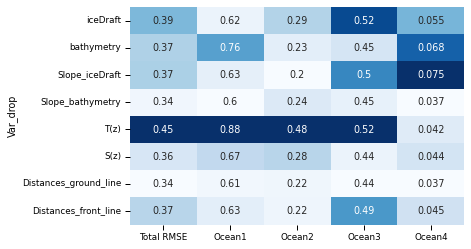

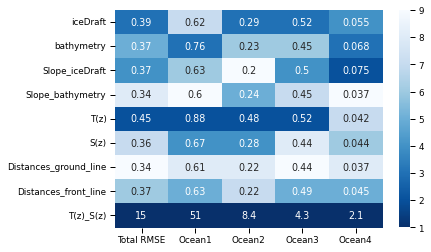

In [ ]:
d = DF.loc[DF.index[:-1]]
Min = d.min()
Max = d.max()
d2 = (d - Min) / (Max - Min)
sns.heatmap(d2, annot=d, cmap="Blues", cbar=False)


#plt.savefig(f'{os.getcwd()}/Image_output/Heatmap_RMSE.png',facecolor = 'white', dpi=300, bbox_inches = "tight")
plt.figure()
h = sns.heatmap(rank, annot=DF, cmap="Blues_r", cbar=True)
h.set(ylabel=None)
plt.savefig(f'{os.getcwd()}/Image_output/Heatmap_RMSE_rank.png',facecolor = 'white', 
            dpi=300, bbox_inches = "tight", annot_kws={'fontsize' : SIZE})


In [ ]:
b = sns.heatmap(rank, cmap = 'Blues_r', annot = A, fmt='.2f', cbar = False, 
                annot_kws={'fontsize' : SIZE})
#sns.set(font_scale = 1.3)
#b.axes.set_xlabel(fontsize = SIZE)
b.axes.set_ylabel('')
b.tick_params(labelsize = SIZE)
sns.despine()

In [36]:
p = f'{os.getcwd()}/Cached_data/Variables_benchmark.csv'
data = pd.read_csv(p)
Var = []
RMSE_oc = []
RMSE_tot = []

for index in data.index:
    cur = data.loc[index]
    if '[' in data['Var'].loc[index]:
        Var.append(ast.literal_eval(data['Var'].loc[index]))
    else:
        Var.append(data['Var'].loc[index])
    RMSE_oc.append(np.array(data['RMSEs'].loc[index].strip('][').split()).astype(float))
    RMSE_tot.append(float(data['RMSE_tot'].loc[index]))


In [78]:
p = f'{os.getcwd()}/Cached_data/Variables_benchmark_shuffle_ALL.csv'
data = pd.read_csv(p)
Var = []
RMSE_oc = []
RMSE_tot = []

for index in data.index:
    cur = data.loc[index]
    if '[' in data['Var'].loc[index]:
        Var.append(ast.literal_eval(data['Var'].loc[index]))
    else:
        Var.append(data['Var'].loc[index])
    RMSE_oc.append(np.array(data['RMSEs'].loc[index].strip('][').split()).astype(float))
    RMSE_tot.append(float(data['RMSE_tot'].loc[index]))
OC = ast.literal_eval(cur['Oc'])

In [52]:
new_v = []
for v in Var:
    if type(v) == list:
        #print(v)
        if 'T_0' in v:
            new_v.append('T(z)')
        elif 'S_0' in v:
            new_v.append('S(z)')
        elif 'Slope' in v[0]:
            new_v.append(v[0][:-2])
    else:
        new_v.append(v)

In [59]:
df = pd.DataFrame()
df['Var_shuffled'] = new_v
df['Total RMSE'] = RMSE_tot
df[Oc] = RMSE_oc
#df[OcT + ALL_EXP] = RMSE_oc
DF = pd.DataFrame(df).set_index('Var_shuffled')

In [20]:
# d = DF
# Min = d.min()
# Max = d.max()
# d2 = (d - Min) / (Max - Min)
# fig, axes = plt.subplots(figsize=(10, 4))
# rank = DF.rank(axis = 0, ascending = False)
# h = sns.heatmap(rank, annot=d, cmap="Blues_r", cbar=True)
# h.set(ylabel=None)
# plt.savefig(f'{os.getcwd()}/Image_output/Heatmap_RMSE_shuffle_OcTExp10-13-22-23.png',facecolor = 'white', dpi=300, bbox_inches = "tight")

In [33]:
ID = 1650362530
#ID = 1651150755
ID = 1650407902
ID = 1653044112 #Shuffle Ep128 Neur 128X5 OcT
ID = 1653216190 #Shuffle Ep128 Neur 128X5 Composite OcT + EXP 10 13 22 23
p = f'{os.getcwd()}/Cached_data/Shuffle_benchmark/'
P = glob.glob(f'{p}*{ID}*')[0]
ALL_p = glob.glob(f'{P}/*.csv')
ALL_p

['/home/bouissob/Code/Cached_data/Shuffle_benchmark/Var_benchmark_1653216190/Var_benchmark_1653216190_0_.csv',
 '/home/bouissob/Code/Cached_data/Shuffle_benchmark/Var_benchmark_1653216190/Var_benchmark_1653216190_1_.csv',
 '/home/bouissob/Code/Cached_data/Shuffle_benchmark/Var_benchmark_1653216190/Var_benchmark_1653216190_2_.csv',
 '/home/bouissob/Code/Cached_data/Shuffle_benchmark/Var_benchmark_1653216190/Var_benchmark_1653216190_3_.csv']

In [34]:
P

'/home/bouissob/Code/Cached_data/Shuffle_benchmark/Var_benchmark_1653216190'

In [35]:
def Convert_var(Var):
    new_v = []
    for v in Var:
        if '[' in v:
            v = ast.literal_eval(v)
        if type(v) == list:
            #print(v)
            Suff = ''
            if '-ms' in v:
                Suff = 'mixed shuffle'
            if 'T_0' in v:
                new_v.append('T(z) ' + Suff)
            elif 'S_0' in v:
                new_v.append('S(z) ' + Suff)
            elif 'Slope' in v[0]:
                new_v.append(v[0][:-2])
            else:
                new_v.append('-'.join(v))
        else:
            new_v.append(v)
    return new_v

In [36]:
li = []
for f in ALL_p:
    df = pd.read_csv(f)
    df['Var_shuffled'] = Convert_var(np.array(df['Var_shuffled']))
    df.set_index('Var_shuffled', inplace = True)
    li.append(df)

In [66]:
A = pd.concat(li).groupby(level=0).mean()
A = A.loc[li[0].index]
Sorting = ['_'.join(i) for i in Dropped_var]
A.rename(columns={'RMSE_tot' : 'Total RMSE'}, inplace = True)


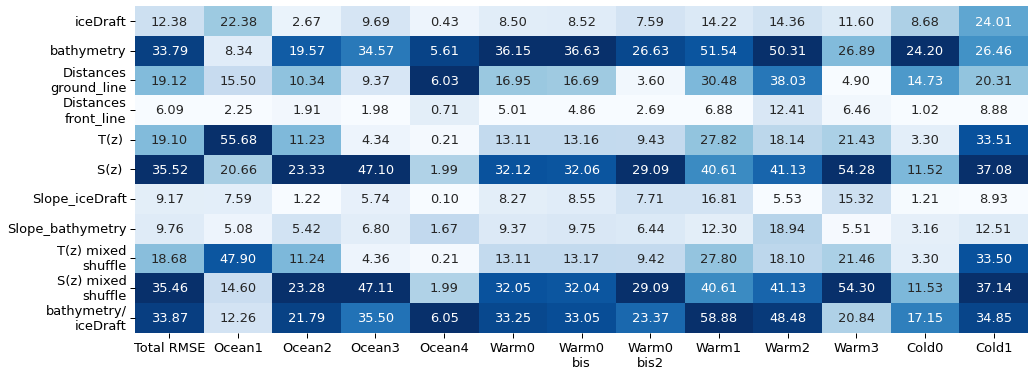

In [75]:
A = pd.concat(li).groupby(level=0).mean()
A = A.loc[li[0].index]
Sorting = ['_'.join(i) for i in Dropped_var]
A.rename(columns={'RMSE_tot' : 'Total RMSE'}, inplace = True)

sns.set_context('paper') 
d = A
New_index = ['iceDraft', 'bathymetry', 'Distances_ground_line',
               'Distances_front_line', 'T(z) ', 'S(z) ', 'Slope_iceDraft', 'Slope_bathymetry',
             'T(z) mixed\nshuffle','S(z) mixed\nshuffle', 'bathymetry/\niceDraft']

New_index = ['iceDraft', 'bathymetry', 'Distances\nground_line',
               'Distances\nfront_line', 'T(z) ', 'S(z) ', 'Slope_iceDraft', 'Slope_bathymetry',
             'T(z) mixed\nshuffle','S(z) mixed\nshuffle', 'bathymetry/\niceDraft']
Renaming_col = {'EXP20' : 'Warm0', 'EXP10' : 'Warm1', 'EXP11' : 'Warm2', 
            'EXP13' : 'Warm3', 'EXP22' : 'Cold0', 'EXP12' : 'Cold1', 'EXP21' : 'Warm0\nbis',
            'EXP23' : 'Warm0\nbis2'}

Dict = {}
for name in d.columns:
    extract = re.findall('CPL_(\w+)_rst', name)
    if extract != []:
        new_n = extract[0]
        Dict[name] = new_n
d.rename(columns=Dict, inplace = True)
d.rename(columns=Renaming_col, inplace = True)
d.rename({'bathymetry-iceDraft': 'bathymetry/\niceDraft', 'T(z) mixed shuffle' : 'T(z) mixed\nshuffle',
         'S(z) mixed shuffle' : 'S(z) mixed\nshuffle', 'Distances_ground_line' : 'Distances\nground_line',
         'Distances_front_line' : 'Distances\nfront_line'}, inplace = True)
col = ['Total RMSE', 'Ocean1', 'Ocean2', 'Ocean3', 'Ocean4', 'Warm0',
    'Warm0\nbis','Warm0\nbis2', 'Warm1', 'Warm2', 'Warm3','Cold0', 'Cold1']
d = d[col]
d = d.loc[New_index]
fig = plt.figure(figsize = (16,6)) # Pour graph seulement OcT dim : (8, 5)
Min = d.min()
Max = d.max()
d2 = 1 - (d - Min) / (Max - Min)
rank = A.rank(axis = 0, ascending = False)
b = sns.heatmap(d2, cmap = 'Blues_r', annot = d, fmt='.2f', cbar = False, 
                annot_kws={'fontsize' : SIZE})
#sns.set(font_scale = 1.3)
#b.axes.set_xlabel(fontsize = SIZE)
b.axes.set_ylabel('')
b.tick_params(labelsize = SIZE)
#sns.despine()
fig.savefig(f'{os.getcwd()}/Image_output/Heatmap_RMSE_shuffle_OcTExp10-13-22-23.png',facecolor = 'white', dpi=300, bbox_inches = "tight")

In [65]:
d

,Total RMSE,Ocean1,Ocean2,Ocean3,Ocean4,Warm0,Warm0\nbis,Warm0\nbis2,Warm1,Warm2,Warm3,Cold0,Cold1
Var_shuffled,,,,,,,,,,,,,
iceDraft,12.375380,22.376464,2.665315,9.692384,0.425268,8.501190,8.521822,7.590006,14.220616,14.361943,11.597832,8.676073,24.008917
bathymetry,33.787155,8.342500,19.565375,34.568999,5.611678,36.150560,36.633391,26.628751,51.535967,50.313774,26.887474,24.198112,26.462061
Distances_ground_line,19.118323,15.496227,10.344796,9.374765,6.034699,16.954461,16.686526,3.595559,30.479061,38.028913,4.896601,14.731626,20.305599
Distances_front_line,6.085283,2.248737,1.908587,1.981431,0.706444,5.010303,4.856167,2.692175,6.884244,12.405640,6.462663,1.019679,8.881225
T(z),19.096272,55.675414,11.230942,4.338942,0.205007,13.106497,13.164271,9.434878,27.823909,18.140333,21.431214,3.303007,33.505402
T(z) mixed shuffle,18.684142,47.898846,11.239965,4.355176,0.205013,13.114319,13.166925,9.421166,27.798488,18.104127,21.463405,3.297661,33.502805
S(z),35.516519,20.660344,23.328516,47.095616,1.994649,32.123234,32.064023,29.090141,40.606803,41.132900,54.281320,11.522912,37.084473
S(z) mixed shuffle,35.460850,14.599857,23.283189,47.113931,1.985206,32.049392,32.038361,29.090713,40.606573,41.133397,54.301920,11.532657,37.139731
Slope_iceDraft,9.171991,7.592488,1.219871,5.736186,0.101174,8.269533,8.553562,7.710795,16.812685,5.526860,15.321818,1.205215,8.925162


In [1]:

# sns.set_context('paper') 
# d = A
# New_index = ['iceDraft', 'bathymetry', 'Distances_ground_line',
#                'Distances_front_line', 'T(z) ', 'S(z) ', 'Slope_iceDraft', 'Slope_bathymetry',
#              'T(z) mixed shuffle','S(z) mixed shuffle', 'bathymetry-iceDraft']
# Dict = {}
# for name in d.columns:
#     extract = re.findall('CPL_(\w+)_rst', name)
#     if extract != []:
#         new_n = extract[0]
#         Dict[name] = new_n
# d.rename(columns=Dict, inplace = True)
# d = d.loc[New_index]
# fig = plt.figure(figsize = (16,6)) # Pour graph seulement OcT dim : (8, 5)
# Min = d.min()
# Max = d.max()
# d2 = 1 - (d - Min) / (Max - Min)
# rank = A.rank(axis = 0, ascending = False)
# b = sns.heatmap(d2, cmap = 'Blues_r', annot = A, fmt='.2f', cbar = False, 
#                 annot_kws={'fontsize' : SIZE})
# #sns.set(font_scale = 1.3)
# #b.axes.set_xlabel(fontsize = SIZE)
# b.axes.set_ylabel('')
# b.tick_params(labelsize = SIZE)
# #sns.despine()
# #fig.savefig(f'{os.getcwd()}/Image_output/Heatmap_RMSE_shuffle_OcTExp10-13-22-23.png',facecolor = 'white', dpi=300, bbox_inches = "tight")